In [1]:
import tensorflow as tf

2023-04-23 18:45:12.949408: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 18:45:13.773338: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import cv2 as cv
import os
%matplotlib inline

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))

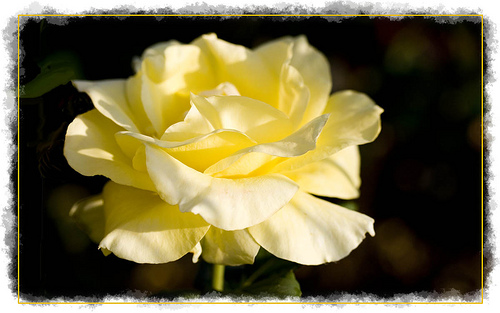

In [7]:
PIL.Image.open(str(roses[30]))

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [10]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv.imread(str(image))
        resized_img = cv.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        
X = np.array(X)
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

2023-04-23 18:31:04.727204: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2023-04-23 18:31:05.179549: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1069977600 exceeds 10% of free system memory.
2023-04-23 18:31:05.907203: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1069977600 exceeds 10% of free system memory.


Epoch 1/30


2023-04-23 18:31:08.088602: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-04-23 18:31:09.509690: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-23 18:31:09.511500: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f8c2f66be80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-23 18:31:09.511515: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-04-23 18:31:09.514576: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-23 18:31:09.618853: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

86/86 [==============================] - 7s 21ms/step - loss: 1.2434 - accuracy: 0.4797
Epoch 2/30
86/86 [==============================] - 2s 21ms/step - loss: 0.9391 - accuracy: 0.6363
Epoch 3/30
86/86 [==============================] - 2s 21ms/step - loss: 0.7475 - accuracy: 0.7173
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.4912 - accuracy: 0.8172
Epoch 5/30
86/86 [==============================] - 2s 21ms/step - loss: 0.2887 - accuracy: 0.9041
Epoch 6/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1719 - accuracy: 0.9459
Epoch 7/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0867 - accuracy: 0.9767
Epoch 8/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0572 - accuracy: 0.9880
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0495 - accuracy: 0.9884
Epoch 10/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0239 - accuracy: 0.9945
Epoch 11/30
86/86 [=

In [14]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 1s 16ms/step - loss: 1.7517 - accuracy: 0.6710


[1.7517039775848389, 0.671023964881897]

In [13]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

2023-04-23 18:45:26.859389: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [14]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

2023-04-23 18:45:30.773222: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1069977600 exceeds 10% of free system memory.
2023-04-23 18:45:31.450958: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1069977600 exceeds 10% of free system memory.


Epoch 1/30


2023-04-23 18:45:33.842420: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-04-23 18:45:35.306498: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-23 18:45:35.308357: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f8e9db8dba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-23 18:45:35.308371: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-04-23 18:45:35.316408: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-23 18:45:35.442862: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

86/86 [==============================] - 7s 22ms/step - loss: 1.4048 - accuracy: 0.3986
Epoch 2/30
86/86 [==============================] - 2s 23ms/step - loss: 1.0862 - accuracy: 0.5759
Epoch 3/30
86/86 [==============================] - 2s 22ms/step - loss: 0.9441 - accuracy: 0.6257
Epoch 4/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8838 - accuracy: 0.6657
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.8385 - accuracy: 0.6846
Epoch 6/30
86/86 [==============================] - 2s 24ms/step - loss: 0.7873 - accuracy: 0.6995
Epoch 7/30
86/86 [==============================] - 2s 24ms/step - loss: 0.7346 - accuracy: 0.7213
Epoch 8/30
86/86 [==============================] - 2s 24ms/step - loss: 0.6974 - accuracy: 0.7315
Epoch 9/30
86/86 [==============================] - 2s 24ms/step - loss: 0.6794 - accuracy: 0.7456
Epoch 10/30
86/86 [==============================] - 2s 24ms/step - loss: 0.6197 - accuracy: 0.7762
Epoch 11/30
86/86 [=

In [15]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 1s 17ms/step - loss: 1.0458 - accuracy: 0.7353


[1.045751690864563, 0.7352941036224365]